In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('drive/MyDrive/cyberbullying_tweets.csv')

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df.shape

(47692, 2)

In [ ]:
#  text preprocessing
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's', 'aren', 'couldn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 're', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [ ]:
def get_top_n_gram(corpus, ngram_range, n = None):
  vec = CountVectorizer(ngram_range = ngram_range, stop_words = STOPWORDS).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

  return words_freq[:n]

In [ ]:
df['tweet_text'] = df['tweet_text'].apply(clean_text)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatizer_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['tweet_text'] = df['tweet_text'].apply(lambda text: lemmatizer_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


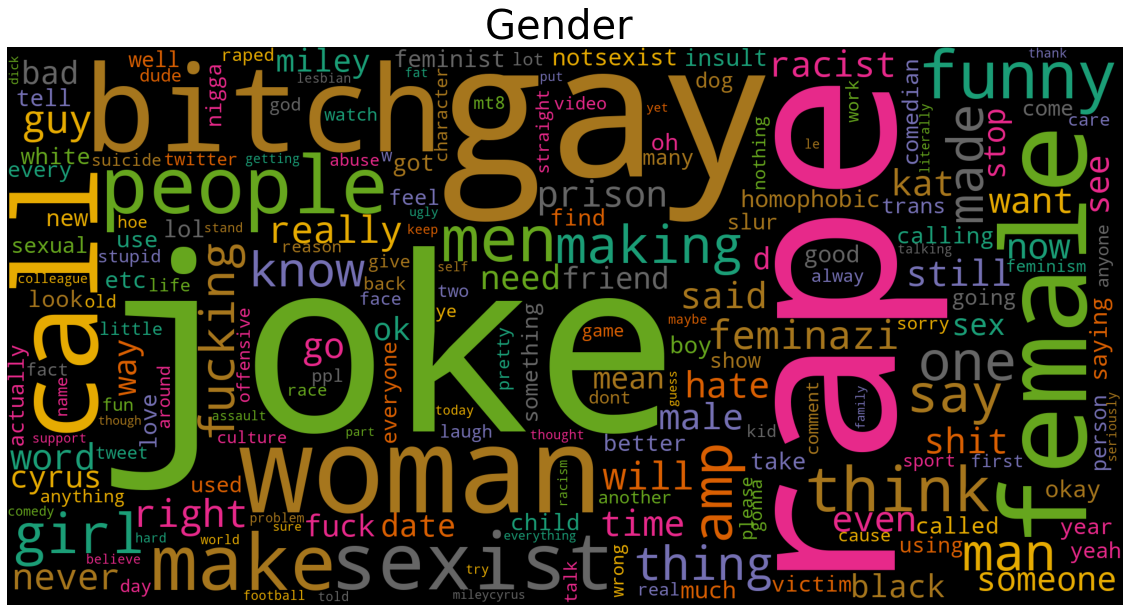

In [ ]:
# visualization 

from wordcloud import WordCloud
plt.figure(figsize = (20, 19))
subs1 = df[df['cyberbullying_type'] == 'gender']
txt_gender = subs1.tweet_text.values
cloud1 = WordCloud(background_color = 'black', colormap = 'Dark2', collocations=False, width = 2000, height = 1000).generate(" ".join(txt_gender))

plt.axis('off')
plt.title('Gender ', fontsize = 40)
plt.imshow(cloud1)

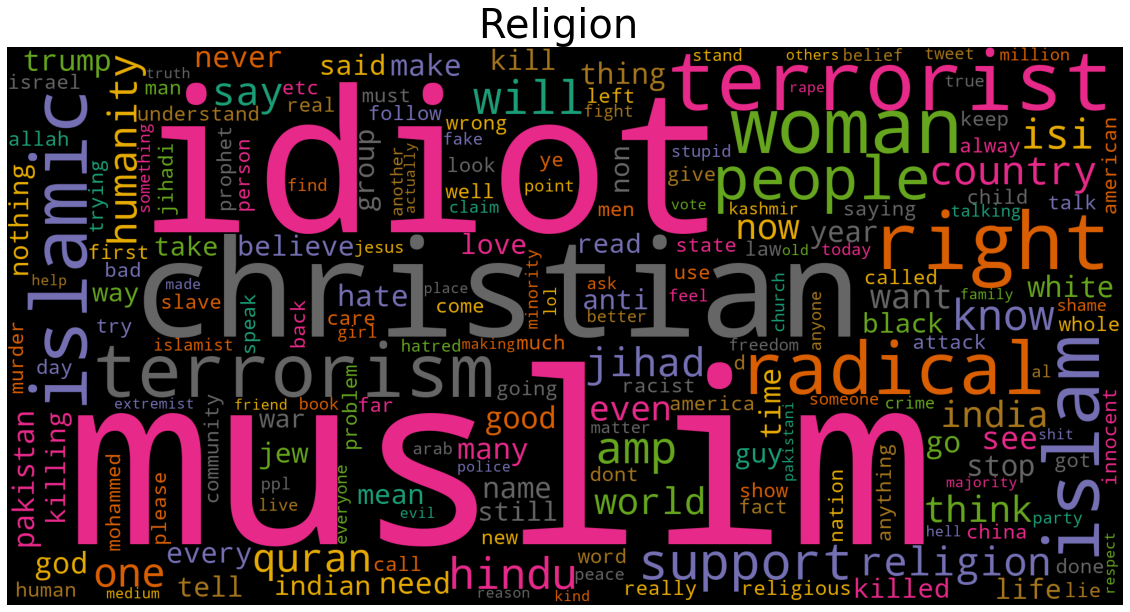

In [ ]:
plt.figure(figsize = (20, 19))
subs2 = df[df['cyberbullying_type'] == 'religion']
txt_religion = subs2.tweet_text.values
cloud2 = WordCloud(background_color = 'black', colormap = 'Dark2', collocations = False, width = 2000, height = 1000).generate(" ".join(txt_religion))

plt.axis('off')
plt.title('Religion ', fontsize = 40)
plt.imshow(cloud2)

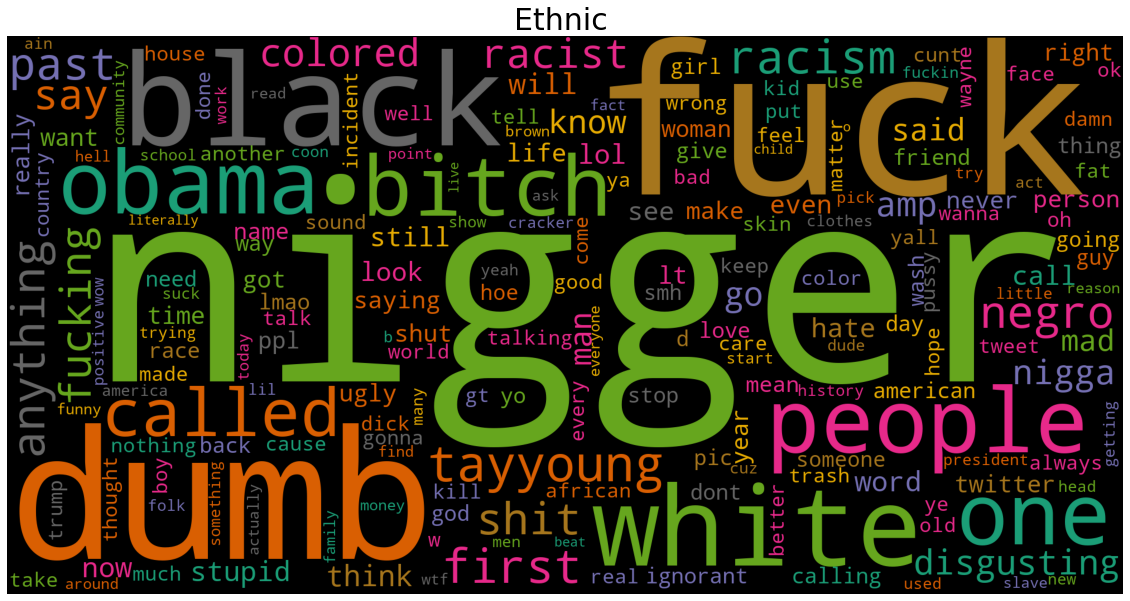

In [ ]:
plt.figure(figsize = (20, 19))
subs3 = df[df['cyberbullying_type'] == 'ethnicity']
txt_etch = subs3.tweet_text.values
cloud3 = WordCloud(background_color = 'black', colormap = 'Dark2_r', collocations = False, width = 2000, height = 1000).generate(" ".join(txt_etch))

plt.axis('off')
plt.title('Ethnic ', fontsize = 30)
plt.imshow(cloud3)

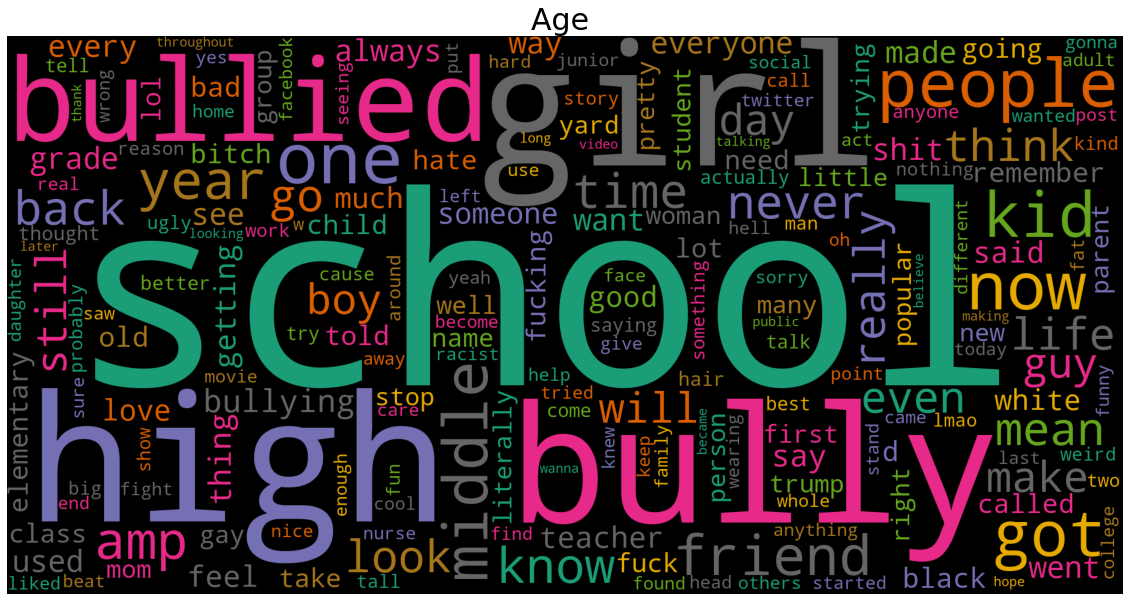

In [ ]:
plt.figure(figsize = (20, 19))
subs4 = df[df['cyberbullying_type'] == 'age']
txt_age = subs4.tweet_text.values
cloud4 = WordCloud(background_color = 'black', colormap = 'Dark2_r', collocations = False, width = 2000, height = 1000).generate(" ".join(txt_age))

plt.axis('off')
plt.title('Age ', fontsize = 30)
plt.imshow(cloud4)

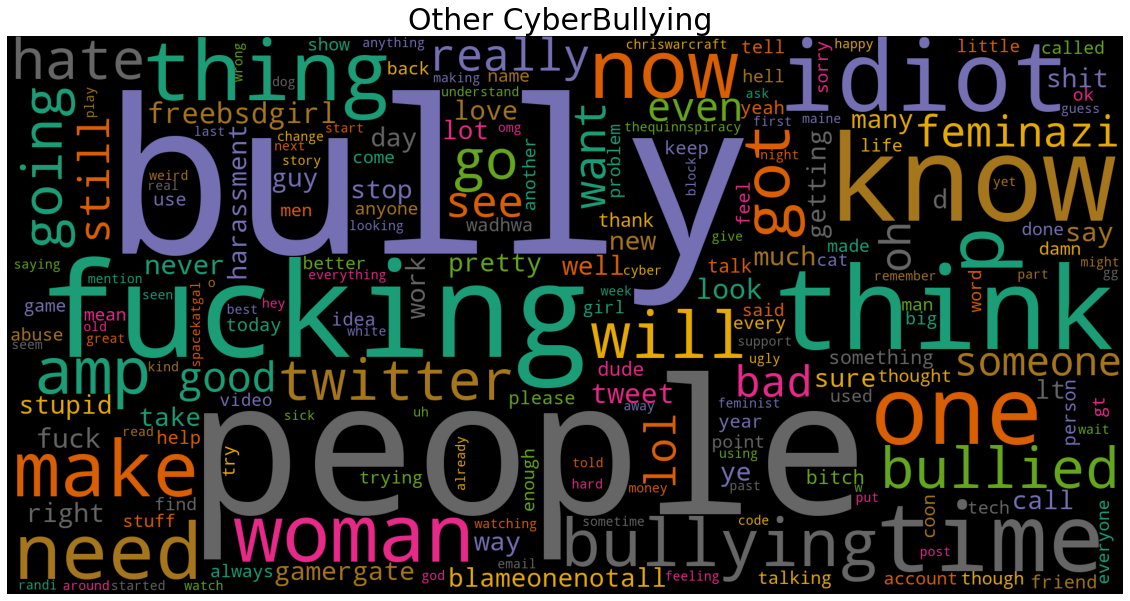

In [ ]:
plt.figure(figsize = (20, 19))
subs5 = df[df['cyberbullying_type'] == 'other_cyberbullying']
txt_other = subs5.tweet_text.values
cloud5 = WordCloud(background_color = 'black', colormap = 'Dark2_r', collocations = False, width = 2000, height = 1000).generate(" ".join(txt_other))

plt.axis('off')
plt.title('Other CyberBullying ', fontsize = 30)
plt.imshow(cloud5)

In [ ]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

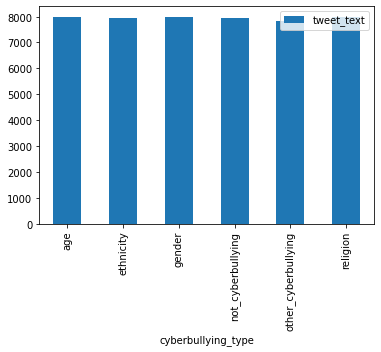

In [ ]:
df.groupby('cyberbullying_type').count().plot(kind = 'bar')
plt.show()

In [ ]:
#  encode
df_enc = df.copy()
le = LabelEncoder()

df_enc['cyberbullying_type'] = le.fit_transform(df_enc['cyberbullying_type'])

df.head()


,tweet_text,cyberbullying_type
0,word katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcake,not_cyberbullying
3,meh p thanks head concerned another angry dude...,not_cyberbullying
4,isi account pretending kurdish account islam lie,not_cyberbullying


In [ ]:
df_encc = df.copy()

ct = pd.get_dummies(df_encc.cyberbullying_type)
df_enc = pd.concat([df_encc, ct], axis=1)

In [ ]:
df_enc.head()

In [ ]:
df_enc = df_enc.drop(columns = ['cyberbullying_type'])

In [ ]:
df['tweet_text'].values

array(['word katandandre food crapilicious',
       'aussietv white theblock imacelebrityau today sunrise studio10 neighbour wonderlandten etc',
       'classy whore red velvet cupcake', ...,
       'swear god dumb nigger bitch got bleach hair reeeeeal fuckin soon d lt fuck',
       'yea fuck therealexel youre nigger fucking unfollow fucking dumb nigger',
       'bro gotta chill chillshrammy dog fuck kp dumb nigger bitch lmao'],
      dtype=object)

In [ ]:
X = df['tweet_text'].values
y = df['cyberbullying_type'].values
# X = df_enc['tweet_text'].values
# y = df_enc[['age',	'ethnicity',	'gender',	'not_cyberbullying'	,'other_cyberbullying',	'religion']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('X TRAIN : ', X_train.shape)
print('X TEST : ', X_test.shape)
print('y TRAIN : ', y_train.shape)
print('Y TEST : ', y_test.shape)

X TRAIN :  (38153,)
X TEST :  (9539,)
y TRAIN :  (38153,)
Y TEST :  (9539,)


In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token = 'x')

tokenizer.fit_on_texts(X_train)

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(seq_train)
pad_test = pad_sequences(seq_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim = 16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.9):
      print('\nAkurasi telah mencapai > 90 %!')
      self.model.stop_training = True

callbacks =  myCallback()

In [ ]:
num_epochs = 30
history = model.fit(pad_train, y_train, epochs = num_epochs, validation_split = ( X_train, y_train), verbose = 2)

In [ ]:
# num_epochs = 50

# history = model.fit(pad_train, y_train, epochs = num_epochs, validation_split = (X_test, y_test), verbose = 2, callbacks = [callbacks])

In [ ]:
# unigrams = get_top_n_gram(txt_religion,(1,1),10)
# bigrams = get_top_n_gram(txt_religion,(2,2),10)

# religion_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
# religion_1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
#     kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Unigrams',orientation='h')

# religion_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
# religion_2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
#     kind='bar', yTitle='Count', linecolor='black',color='black', title='Top 10 Bigrams',orientation='h')